<a href="https://colab.research.google.com/github/Pravallikavyas/Linear-Regression/blob/main/Copy_of_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [4]:
df = pd.read_csv("/content/Copy of car_data.csv")
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [5]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [6]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [7]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [8]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [9]:
df=df.drop_duplicates()

In [10]:
df.shape

(804, 12)

In [11]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [12]:
df['Make'].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [13]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Make']]).toarray())

#merge one-hot encoded columns back with original DataFrame
df1= df.join(encoder_df)

#view final df
df1

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,0,1,2,3,4,5
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
temp1=df[['Price','Mileage']].copy()
temp1

,Price,Mileage
0,17314.103129,8221
1,17542.036083,9135
2,16218.847862,13196
3,16336.913140,16342
4,16339.170324,19832
...,...,...
799,16507.070267,16229
800,16175.957604,19095
801,15731.132897,20484
802,15118.893228,25979


In [15]:
q3=df.Price.quantile(0.75)
q1=df.Price.quantile(0.25)
iqr=q3-q1
upper_threshold=q3+(1.5*iqr)
lower_threshold=q1-(1.5*iqr)
upper_threshold,lower_threshold

(45383.68078365926, -4393.290277667038)

In [16]:
temp1["Price"]=temp1.Price.clip(-4393,45383)

In [17]:
iqr=df.Mileage.quantile(0.75)-df.Mileage.quantile(0.25)
up_t=q3+(1.5*iqr)
lo_t=q1-(1.5*iqr)
up_t,lo_t

(42601.566635661904, -1611.176129669675)

In [18]:
temp1["Mileage"]=temp1.Mileage.clip(-1611,42601)

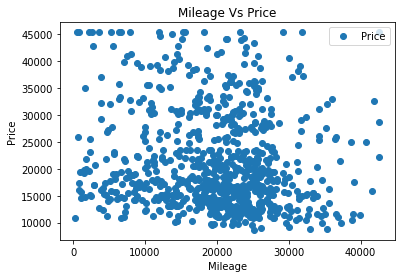

In [19]:
temp1.plot(x='Mileage',y='Price',style="o")
plt.title('Mileage Vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [20]:
temp1.corr()

,Price,Mileage
Price,1.000000,-0.137725
Mileage,-0.137725,1.000000


In [21]:
temp1.shape

(804, 2)

In [22]:
X=temp1.loc[:,['Mileage']].values.reshape(-1,1)
y=temp1.loc[:,'Price'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [23]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [24]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression( )
regressor.fit(X_train,y_train)

LinearRegression()

In [25]:
print(regressor.intercept_)

[21247.47759728]


In [26]:
print(regressor.coef_)

[[-1037.3248742]]


In [27]:
y_pred=regressor.predict(X_test)

In [29]:
f1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
f1

ValueError: ignored

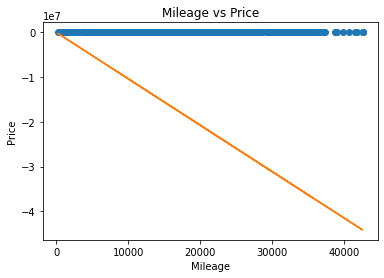

In [30]:
y_pred=regressor.predict(X) 
plt.plot(X, y, 'o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.plot(X, y_pred)

In [31]:
from sklearn import metrics
regressor.score(X_test,y_test)

0.028628359075915433

In [32]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [33]:
df.Cylinder.value_counts()

4    394
6    310
8    100
Name: Cylinder, dtype: int64

In [34]:
df.Sound.value_counts()

1    546
0    258
Name: Sound, dtype: int64

In [35]:
df.Doors.value_counts()

4    614
2    190
Name: Doors, dtype: int64

In [36]:
df.Cruise.value_counts()

1    605
0    199
Name: Cruise, dtype: int64

In [55]:
df.Liter.value_counts()

2.2    190
3.8    160
3.5     80
4.6     60
1.6     60
2.0     60
2.3     50
3.6     30
1.8     30
5.7     20
6.0     20
3.1     10
2.8     10
3.4     10
3.0     10
2.5      4
Name: Liter, dtype: int64

In [56]:
df.Leather.value_counts()

1    582
0    222
Name: Leather, dtype: int64

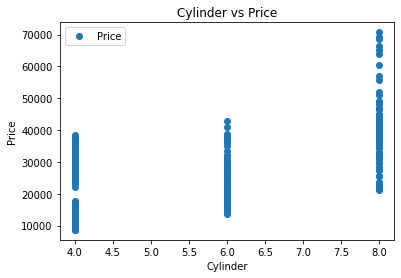

In [57]:
df.plot(x='Cylinder', y='Price', style='o')
plt.title('Cylinder vs Price')
plt.xlabel('Cylinder')
plt.ylabel('Price')
plt.show()

In [58]:
df[['Price','Cylinder']].corr()

,Price,Cylinder
Price,1.000000,0.569086
Cylinder,0.569086,1.000000


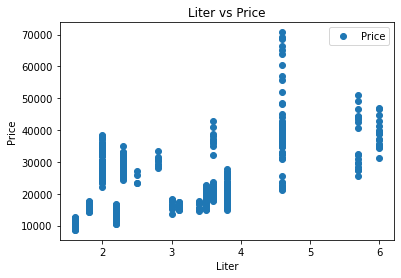

In [59]:
df.plot(x='Liter', y='Price', style='o')
plt.title('Liter vs Price')
plt.xlabel('Liter')
plt.ylabel('Price')
plt.show()

In [60]:
df[['Liter','Price']].corr()

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


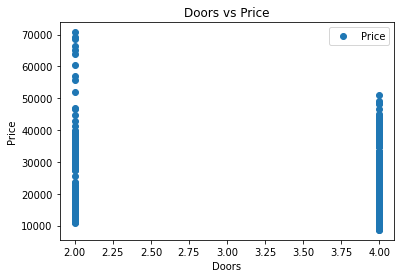

In [61]:
df.plot(x='Doors',y='Price',style='o')
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()

In [62]:
df[['Doors','Price']].corr()

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


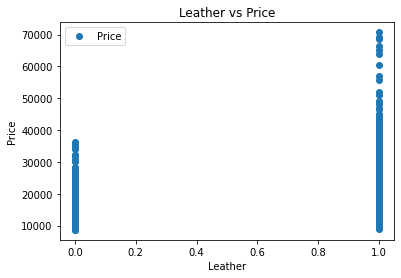

In [63]:
df.plot(x='Leather', y='Price', style='o')
plt.title('Leather vs Price')
plt.xlabel('Leather')
plt.ylabel('Price')
plt.show()

In [64]:
df[['Leather','Price']].corr()

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


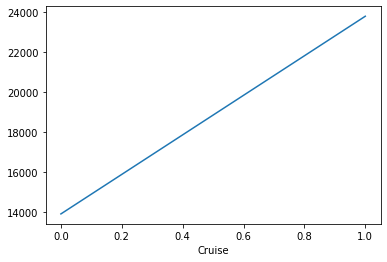

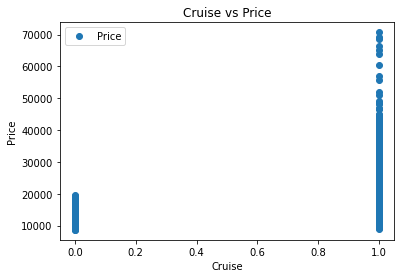

In [65]:
df.groupby('Cruise')['Price'].mean().plot()
df.plot(x='Cruise', y='Price', style='o')
plt.title('Cruise vs Price')
plt.xlabel('Cruise')
plt.ylabel('Price')
plt.show()

In [66]:
df[['Cruise','Price']].corr()

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


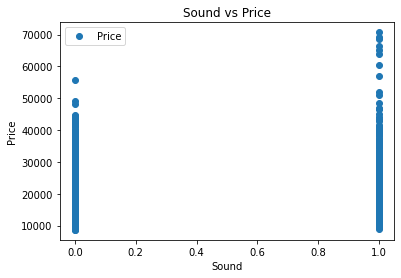

In [67]:
df.plot(x='Sound', y='Price', style='o')
plt.title('Sound vs Price')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.show()

In [68]:
df[['Sound','Price']].corr()

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


In [69]:
X = df.loc[:, ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values 
y = df.loc[:, 'Price'].values 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [70]:
X_train

array([[4. , 2.2, 2. , 1. , 1. , 1. ],
       [6. , 3.8, 2. , 1. , 1. , 0. ],
       [6. , 3.8, 4. , 1. , 0. , 1. ],
       ...,
       [8. , 4.6, 4. , 1. , 1. , 1. ],
       [6. , 3.8, 4. , 1. , 1. , 1. ],
       [8. , 4.6, 2. , 1. , 1. , 1. ]])

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [44]:
print(regressor.intercept_)

20823.841991103738


In [45]:
c = pd.DataFrame(regressor.coef_,['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], columns= ['Cofficient'])
c

,Cofficient
Cylinder,4360.499784
Liter,-84.162392
Doors,-1260.252623
Cruise,2525.644772
Sound,-891.839451
Leather,1285.384038


In [46]:
y_pred=regressor.predict(X_test)

In [47]:
f2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
f2

,Actual,Predicted
0,22470.358430,24541.496642
1,15639.036743,20144.456068
2,22120.757765,24390.609591
3,19528.100433,21552.810044
4,30792.149029,24468.636625
...,...,...
237,12828.030977,21062.234533
238,35580.332314,18240.040392
239,42773.028390,33649.541626
240,31181.715159,32690.113958


In [48]:
from sklearn import metrics
regressor.score(X_test,y_test)

0.46154718072886736

In [49]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [50]:
df_temp = df[['Price','Make','Model','Type']]
df_temp

,Price,Make,Model,Type
0,17314.103129,Buick,Century,Sedan
1,17542.036083,Buick,Century,Sedan
2,16218.847862,Buick,Century,Sedan
3,16336.913140,Buick,Century,Sedan
4,16339.170324,Buick,Century,Sedan
...,...,...,...,...
799,16507.070267,Saturn,L Series,Sedan
800,16175.957604,Saturn,L Series,Sedan
801,15731.132897,Saturn,L Series,Sedan
802,15118.893228,Saturn,L Series,Sedan


In [71]:
df_temp.shape

(804, 4)

In [72]:
df_temp.Make.value_counts()

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64

In [51]:
temp2=pd.get_dummies(data=df_temp,columns=['Make','Model','Type'])
temp2

,Price,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [73]:
temp2.shape

(804, 44)

In [74]:
temp2.head()

,Price,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [88]:
X = df_temp.iloc[:, 1:].values 
y = df_temp.loc[:, 'Price'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)